In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [52]:
df = df.dropna()

In [53]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [72]:
X = df[['YearsExperience']]
y = df['Salary']

In [69]:
y = df['Salary']
X = df.drop(columns='Salary').values
print(X.shape, y.shape)

(30, 1) (30,)


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
X_train.shape

(24, 1)

In [75]:
X_test.shape

(6, 1)

In [76]:
model = LinearRegression()  # Create a Linear Regression model
model.fit(X_train, y_train)

LinearRegression()

In [88]:
print(model.coef_[0],model.intercept_)

9423.815323030976 25321.583011776813


In [77]:
y_pred = model.predict(X_test)

In [78]:
results = pd.DataFrame({
          "Actual Price": y_test,
          "Predicted price": y_pred
}).reset_index(drop = True)

In [79]:
print(results.head())

   Actual Price  Predicted price
0        112635    115790.210113
1         67938     71498.278095
2        113812    102596.868661
3         83088     75267.804224
4         64445     55477.792045


In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [81]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 49830096.86
R^2 Score: 0.90


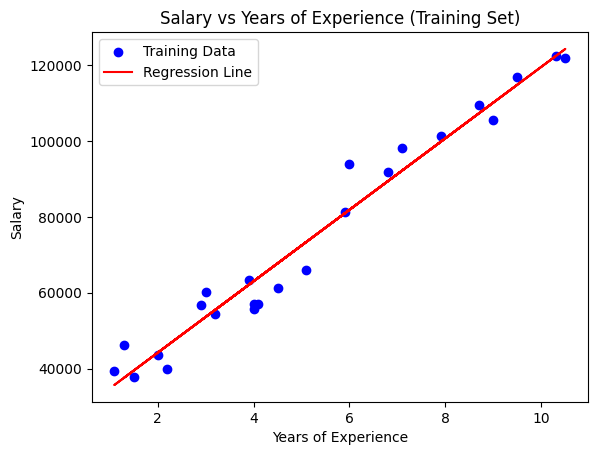

In [82]:
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_train, model.predict(X_train), color="red", label="Regression Line")
plt.title("Salary vs Years of Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()


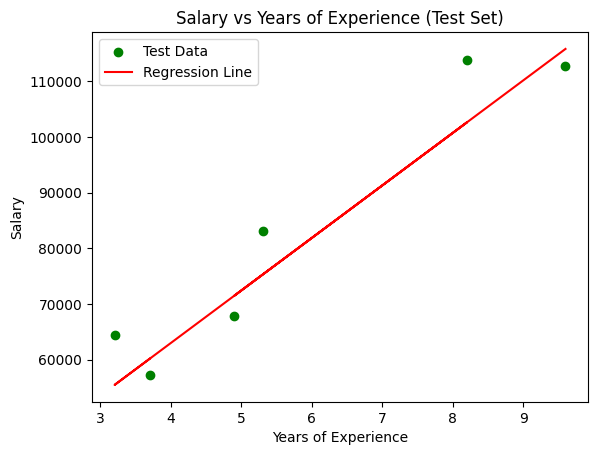

In [85]:
plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.title("Salary vs Years of Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()
